In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [2]:
data = pd.read_csv("desktop/ML_DL_projects/ex2data2.txt", header = None)
x = np.array(data.iloc[:, 0:2])
y = np.array(data.iloc[:, -1])
print(data.head())
print(data.describe())

          0        1  2
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1
                0           1           2
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646562    1.000000
max      1.070900    1.108900    1.000000


## Visualize the data

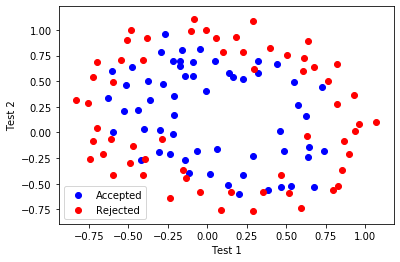

In [3]:
x_pos = np.array([x[i] for i in range(len(x)) if y[i] == 1])
x_neg = np.array([x[j] for j in range(len(x)) if y[j] == 0])
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker = "o", color = "b")
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker = "o", color = "r")
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)
plt.show()

## Feature mapping

In [4]:
def featuremapping(x1, x2, degree):
    output = np.ones(len(x1)).reshape(len(x1), 1)
    for i in range(1, degree + 1):
        for j in range(i + 1):
            terms = (x1**(i-j) * x2**j).reshape(len(x1),1)
            output = np.hstack((output, terms))
    return output
x = featuremapping(x[:, 0], x[:, 1], 6)
print(x) # after adding polynomial terms with feature mapping

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


## Activation function

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
print(f"value of sigmoid 0 : {sigmoid(0)}")
print(f"value of sigmoid 12 : {sigmoid(12)}")

value of sigmoid 0 : 0.5
value of sigmoid 12 : 0.9999938558253978


## Cost Function with Regularization

In [6]:
def compute_cost(x, y, theta, Lambda):
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(x @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    j0= 1/m * (x.transpose() @ (predictions - y))[0]
    j1 = 1/m * (x.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j0[:,np.newaxis],j1))
    return regCost[0], grad
initial_theta = np.zeros((x.shape[1], 1))
Lambda = 1
cost, grad = compute_cost(x, y, initial_theta, Lambda)
print(f"Cost with initial theta : {cost}")

Cost with initial theta : 0.6931471805599461


## Gradient Descent function

In [7]:
def gradient_descent(x, y, theta, alpha = 1, iterations = 1000, Lambda = 0.2):
    m = len(y)
    J = []
    for i in range(iterations):
        cost, grad = compute_cost(x, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J.append(cost)
        if i % 100 == 0:
            print(f"Cost after iteration {i} : {cost}")
    return theta, J

In [8]:
optimized_theta, J_plot = gradient_descent(x, y, initial_theta)
print(f"optimized theta : {optimized_theta}")

Cost after iteration 0 : 0.6931471805599461
Cost after iteration 100 : 0.4750230594456889
Cost after iteration 200 : 0.4450389451973892
Cost after iteration 300 : 0.43674321997950855
Cost after iteration 400 : 0.4339854938135358
Cost after iteration 500 : 0.4329812086582521
Cost after iteration 600 : 0.4325954675573181
Cost after iteration 700 : 0.4324430605552769
Cost after iteration 800 : 0.4323828756005269
Cost after iteration 900 : 0.4323603618208045
optimized theta : [[ 2.27880244]
 [ 1.46080586]
 [ 2.35715798]
 [-3.59422604]
 [-2.40535327]
 [-3.15318778]
 [ 0.50807836]
 [-0.89035258]
 [-0.67140838]
 [-0.23901954]
 [-2.71375359]
 [ 0.08398879]
 [-1.33697646]
 [-0.82533105]
 [-2.24721195]
 [-0.41291091]
 [-0.43180184]
 [ 0.13263545]
 [-0.71800752]
 [-0.80905336]
 [-0.41741552]
 [-2.03405013]
 [ 0.19138695]
 [-0.6033608 ]
 [ 0.13782491]
 [-0.75975933]
 [-0.54578483]
 [-1.34424316]]


## Learning Curve

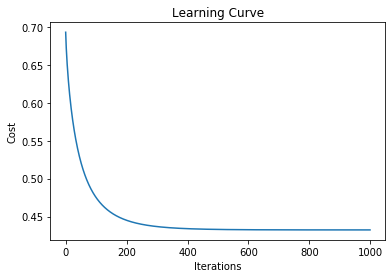

In [9]:
plt.plot(J_plot)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.show()

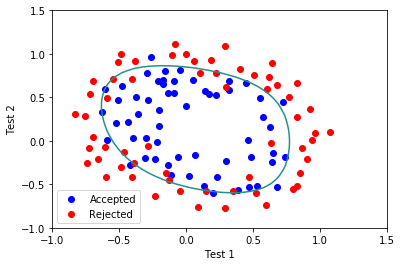

In [14]:
def mapFeaturePlot(x1,x2,degree):
    output = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            output = np.hstack((output,terms))
    return output
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker = "o", color = "b", label = "Accepted")
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker = "o", color = "r", label = "Rejected")
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ optimized_theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(loc="lower left")

## Accuracy

In [12]:
def predict(x, theta):
    predictions = np.dot(x, theta)
    return predictions > 0
p = predict(x, optimized_theta)
print("Training Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Training Accuracy: 83.05084745762711 %


## Code contributed by Sammya Majumdar